In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns


In [2]:
df= pd.read_csv("ted_main.csv")

In [3]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

In [ ]:
# 1. what's the 20 most viewed Ted Talks of all time? (cauae the nbr views is a good indicator of the popularity of the talk)
# 2. Comments [mean, max, min,]
# 3. Does comments have relationship with views? 
# 4. which talks tend to attract more comments? 
# 5. Month (which month has more talks) and (which day has most talks as well) & Year analysis
# 6. TED Talk vs. TEDx Talk 
# 7. Ted Speakers -- Most appearances and occupation
# 8. Ted Languate -- is a good indicator to say the popularity in the world
# 9. theme --tags --- probably not.. can not decide the theme only based on the tags... or we have other solutions
# 10.durations
# 11.tags -- choose several and know the top 5 talks --- sub items, how to impay to the whole DF??
# 12.Related talks - how talks relates with other talks?? -- do not know how to do...

In [6]:
# tansfer the film_date and published_date to human readable format
import datetime
df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [7]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [8]:
# Most Viewed Ted Talks of All Time
most_viewd_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:20]
most_viewd_talks

# Observations: 
# Ken Robinson's talk on Do Schools Kill Creativity? is the most popular TED Talk of all time with 47.2 million views.
# There are only 2 talks have surpassed the 40 million mark and 4 talks that have crossed the 30 million mark.

,title,main_speaker,views,film_date
0,Do schools kill creativity?,Ken Robinson,47227110,24-02-2006
1346,Your body language may shape who you are,Amy Cuddy,43155405,25-06-2012
677,How great leaders inspire action,Simon Sinek,34309432,16-09-2009
837,The power of vulnerability,Brené Brown,31168150,05-06-2010
452,10 things you didn't know about orgasm,Mary Roach,22270883,05-02-2009
1776,How to speak so that people want to listen,Julian Treasure,21594632,09-06-2013
201,My stroke of insight,Jill Bolte Taylor,21190883,26-02-2008
5,Why we do what we do,Tony Robbins,20685401,01-02-2006
2114,This is what happens when you reply to spam email,James Veitch,20475972,07-12-2015
1416,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,19787465,26-10-2012


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


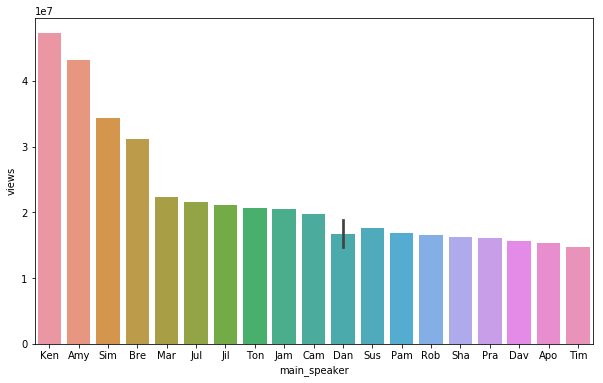

In [9]:
most_viewd_talks['main_speaker'] = most_viewd_talks['main_speaker'].apply(lambda x: x[:3])
plt.figure(figsize=(10,6))
sns.barplot(x='main_speaker', y='views', data=most_viewd_talks)
plt.tilte = "Most Viewd Taks and Main Speaker"

In [10]:
# Comments
df['comments'].describe()
# Observations: The average comments on every TALK is 191.5;
# The high STD is a good indicator that the measure is be sensitive to outliers. (skewer) 
# The minimum comments is 2, probably this video was posted extremly recently. 

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

In [11]:
df[['views','comments']].corr()
# the correlationship between them is 0.53, which indicates a medium strong relationship

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


In [12]:
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)
# As we can see, Do schooks kill creative has more views but the comments is less than the Millitant antheism. (Interesting... It seems like some topics attract more comments while others not) 

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [13]:
#  which talks tend to attract more comments? 
df['dis_quo'] = df['comments']/df['views']

In [14]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049


In [15]:
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'tags','film_date']].sort_values('dis_quo', ascending=False).head(10)
# The case for same-sex marrighe attacted more disscussion; 
# science and religion is still a very debated topic. 

,title,main_speaker,views,comments,dis_quo,tags,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,"['God', 'LGBT', 'culture', 'government', 'law'...",01-12-2009
803,E-voting without fraud,David Bismark,543551,834,0.001534,"['culture', 'democracy', 'design', 'global iss...",13-07-2010
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,"['God', 'atheism', 'culture', 'religion', 'sci...",01-02-2002
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,"['TED Fellows', 'children', 'culture', 'film',...",09-02-2010
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,"['art', 'cities', 'culture', 'data', 'design',...",02-03-2011
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,"['TEDx', 'culture', 'global issues', 'journali...",09-10-2010
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,"['anthropology', 'storytelling']",07-12-2010
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,"['brain', 'consciousness', 'neuroscience', 'ph...",17-03-2014
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,"['global issues', 'medicine', 'religion', 'sci...",10-02-2010
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,"['culture', 'dance', 'entertainment', 'global ...",03-11-2009


In [16]:
# how the talks distributed over the year and month?
df['month'] = df['film_date'].apply(lambda x:x.split('-')[1])
month_df = pd.DataFrame(df['month'].value_counts()).reset_index()
month_df.columns = ['month', 'talks']


In [17]:
month_df


,month,talks
0,02,645
1,03,354
2,06,271
3,07,250
4,11,240
5,10,205
6,04,172
7,05,123
8,09,114
9,12,111


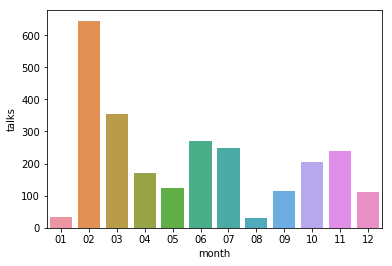

In [18]:
sns.barplot(x='month', y='talks', data=month_df)
# obersavation:
# Feb has the most talks. While August and Jan are slow months. Probably it is because the fact that officaial TED Conferences are held in Feb.
# useful link:https://www.quora.com/Whats-the-difference-between-TED-and-TEDx

In [19]:
df_x = df[df['event'].str.contains('TEDx')]


In [20]:
df_x['month'].value_counts()
# Compared wiht TED, TEDx has more talks on November. It might be the dataset we used is not at all represent all TEDx Talks

11    103
10     65
04     55
09     54
05     42
06     35
03     33
02     23
01     21
12     18
07     12
08     10
Name: month, dtype: int64

In [21]:
# which day (Monday to Sunday... I assumed it probably weekends..)

In [22]:
# Year Analysis - Which year has more talks? 
df['Year'] = df['film_date'].apply(lambda x:x.split('-')[2])
Year_df = pd.DataFrame(df['Year'].value_counts()).reset_index()
Year_df.columns = ['Year', 'talks']

In [23]:
Year_df

,Year,talks
0,2011,270
1,2013,270
2,2010,267
3,2012,267
4,2016,246
5,2015,239
6,2014,237
7,2009,232
8,2007,112
9,2017,98


In [24]:
len(Year_df)

24

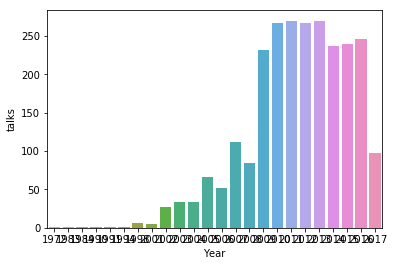

In [25]:
sns.barplot(x='Year', y='talks', data=Year_df)

# need to fix the x axis 
# Obervations:.........

In [26]:
# the most popular speakers --which speaker has the most films?
speaker_df = df.groupby('main_speaker').count().reset_index()[['main_speaker', 'comments']]
speaker_df.columns = ['main_speaker', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)
# Observation: 
# Hasn Rosling has most talks on TED 

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


In [27]:
#  which occupation occure more often?
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)

In [28]:
occupation_df

,occupation,appearances
1426,Writer,45
83,Artist,34
413,Designer,34
753,Journalist,33
515,Entrepreneur,31
71,Architect,30
733,Inventor,27
1131,Psychologist,26
1011,Photographer,25
567,Filmmaker,21


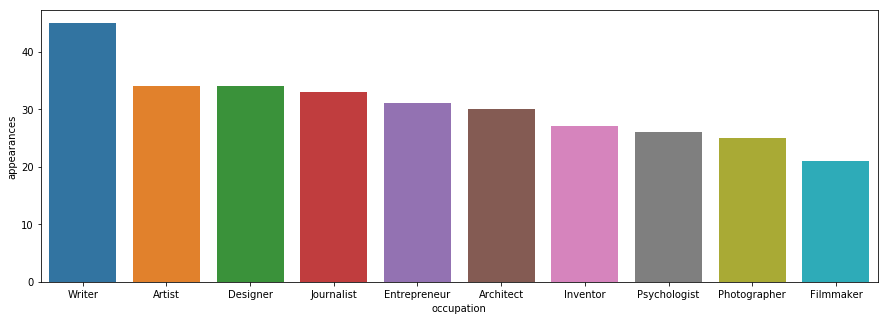

In [29]:
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()
# Observations:
# Writes are the most poplulare occupations during the past years in TED Talks

In [30]:
# if there has a relationship between language and views? 
df['languages'].describe()

# Generally speaking, each talks has been translated into 27 languages. 

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [31]:
# what's the title of the one with 72 translations and 0 as well?
df[df['languages'] == 72]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,Year
973,736,"Is there something you've always meant to do, ...",207,TED2011,02-03-2011,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,01-07-2011,"[{'id': 10, 'name': 'Inspiring', 'count': 6171...","[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,03,2011


In [32]:
df[df['languages'] == 0] 
# but still have some views..

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,Year
58,222,"Two Pilobolus dancers perform ""Symbiosis."" Doe...",825,TED2005,24-02-2005,0,Pilobolus,"Pilobolus: A dance of ""Symbiosis""",1,08-02-2007,"[{'id': 1, 'name': 'Beautiful', 'count': 1810}...","[{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...",Dance company,"['dance', 'entertainment', 'nature', 'performa...","A dance of ""Symbiosis""",https://www.ted.com/talks/pilobolus_perform_sy...,3051507,0.000073,02,2005
115,27,The avant-garde string quartet Ethel performs ...,214,TED2006,01-02-2006,0,Ethel,"Ethel: A string quartet plays ""Blue Room""",1,18-06-2007,"[{'id': 1, 'name': 'Beautiful', 'count': 216},...","[{'id': 103, 'hero': 'https://pe.tedcdn.com/im...",String quartet,"['cello', 'collaboration', 'culture', 'enterta...","A string quartet plays ""Blue Room""",https://www.ted.com/talks/ethel_performs_blue_...,384641,0.000070,02,2006
135,36,After Vusi Mahlasela's 3-song set at TEDGlobal...,299,TEDGlobal 2007,07-06-2007,0,Vusi Mahlasela,"Vusi Mahlasela: ""Woza""",1,21-08-2007,"[{'id': 8, 'name': 'Informative', 'count': 4},...","[{'id': 158, 'hero': 'https://pe.tedcdn.com/im...","Musician, activist","['Africa', 'entertainment', 'guitar', 'live mu...","""Woza""",https://www.ted.com/talks/vusi_mahlasela_s_enc...,416603,0.000086,06,2007
209,67,"Rokia Traore sings the moving ""M'Bifo,"" accomp...",419,TEDGlobal 2007,05-06-2007,0,Rokia Traore,"Rokia Traore: ""M'Bifo""",1,26-03-2008,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 5...","[{'id': 265, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'entertainment', 'guitar', 'live mu...","""M'Bifo""",https://www.ted.com/talks/rokia_traore_sings_m...,294936,0.000227,06,2007
237,43,"Singer-songwriter Rokia Traore performs ""Kouna...",386,TEDGlobal 2007,05-06-2007,0,Rokia Traore,"Rokia Traore: ""Kounandi""",1,04-06-2008,"[{'id': 22, 'name': 'Fascinating', 'count': 84...","[{'id': 186, 'hero': 'https://pe.tedcdn.com/im...",Singer-songwriter,"['Africa', 'guitar', 'live music', 'music', 's...","""Kounandi""",https://www.ted.com/talks/rokia_traore_sings_k...,82488,0.000521,06,2007
249,50,Composer Sxip Shirey makes music from the simp...,186,TED2008,11-02-2008,0,Sxip Shirey + Rachelle Garniez,Sxip Shirey + Rachelle Garniez: A performance ...,2,29-06-2008,"[{'id': 9, 'name': 'Ingenious', 'count': 44}, ...","[{'id': 115, 'hero': 'https://pe.tedcdn.com/im...",Musician,"['entertainment', 'live music', 'music']","A performance with breath, music, passion",https://www.ted.com/talks/sxip_shirey_at_the_b...,217663,0.000230,02,2008
399,194,"Eric Lewis, an astonishingly talented crossove...",636,TED2009,05-02-2009,0,Eric Lewis,Eric Lewis: Piano jazz that rocks,1,05-03-2009,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 46, 'hero': 'https://pe.tedcdn.com/ima...",Pianist,"['entertainment', 'innovation', 'invention', '...",Piano jazz that rocks,https://www.ted.com/talks/eric_lewis_strikes_c...,697257,0.000278,02,2009
446,138,Eric Lewis explores the piano's expressive pow...,294,TED2009,04-02-2009,0,Eric Lewis,Eric Lewis: Chaos and harmony on piano,1,11-05-2009,"[{'id': 26, 'name': 'Obnoxious', 'count': 84},...","[{'id': 478, 'hero': 'https://pe.tedcdn.com/im...",Pianist,"['art', 'entertainment', 'live music', 'music'...",Chaos and harmony on piano,https://www.ted.com/talks/eric_lewis_plays_cha...,391427,0.000353,02,2009
474,135,Organ virtuoso Qi Zhang plays her electric ren...,185,TEDxUSC,22-03-2009,0,Qi Zhang,Qi Zhang: An electrifying organ performance,1,19-06-2009,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 46, 'hero': 'https://pe.tedcdn.com/ima...",Organist,"['TEDx', 'china', 'music', 'performance', 'pia...",An electrifying organ performance,https://www.ted.com/talks/qi_zhang_s_electrify...,803691,0.000168,03,2009
512,146,Vishal Vaid and his band explore a traditional...,8

In [33]:
# if there has correlation between languages and views?
df[['views','languages']].corr()

# the coorlations between them is low.

,views,languages
views,1.000000,0.377623
languages,0.377623,1.000000


In [35]:
# Durationg analysis
df['duration'] = df['duration']/60
df['duration'].describe()

# Observations:
# the average length is 13.8 mins, the max is 87.6 mins and the shortest one is 2.25mins 

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [71]:
df.iloc[1]['ratings']
# rating should be the different type -- choose several categories to find the top 10  with title , speaker 

[{'id': 7, 'name': 'Funny', 'count': 544},
 {'id': 3, 'name': 'Courageous', 'count': 139},
 {'id': 2, 'name': 'Confusing', 'count': 62},
 {'id': 1, 'name': 'Beautiful', 'count': 58},
 {'id': 21, 'name': 'Unconvincing', 'count': 258},
 {'id': 11, 'name': 'Longwinded', 'count': 113},
 {'id': 8, 'name': 'Informative', 'count': 443},
 {'id': 10, 'name': 'Inspiring', 'count': 413},
 {'id': 22, 'name': 'Fascinating', 'count': 132},
 {'id': 9, 'name': 'Ingenious', 'count': 56},
 {'id': 24, 'name': 'Persuasive', 'count': 268},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 116},
 {'id': 26, 'name': 'Obnoxious', 'count': 131},
 {'id': 25, 'name': 'OK', 'count': 203}]

In [79]:
# for all possible tags:
# what are the talks that are the most of that tag?

from collections import defaultdict

tag_to_talk = defaultdict(list)
# dictionary stores a key for the name of the TAG and a list for its value
# the list is a list of tuples, consisting o

for index, row in df.iterrows():
    talk_name = row['name']
    ratings = row['ratings']
    for tag_row in ratings:
        #<tagname: [(talkname, count), (talkname, count)]
        tag_to_talk[tag_row.get('name')].append((talk_name, tag_row.get('count')))
        
        
# originally you had 1 row per talk and within that, the ratings and counts
# you probably want 1 row per talk AND tag

In [84]:
# each Talks has different categories --- like tree map --- want to get the sub-items --????? 
sorted(tag_to_talk['Longwinded'], key=lambda x: x[1], reverse=True)[:5]

[('Daniel Libeskind: 17 words of architectural inspiration', 447),
 ('Jill Bolte Taylor: My stroke of insight', 398),
 ('Simon Sinek: How great leaders inspire action', 390),
 ('Ken Robinson: Do schools kill creativity?', 387),
 ('Steven Pinker: What our language habits reveal', 352)]

In [80]:
for_df = []

for tag, value in tag_to_talk.items():
    for row in value:
        talk, rating = row
        for_df.append({
            "tag": tag, 
            "talk": talk, 
            "rating": rating
        })
out = pd.DataFrame.from_records(for_df)

out.head()

# normalize for number of views? take ratings counts / nbr of views
# Then you could really find what is funniest, or most longwinded

,rating,tag,talk
0,19645,Funny,Ken Robinson: Do schools kill creativity?
1,544,Funny,Al Gore: Averting the climate crisis
2,964,Funny,David Pogue: Simplicity sells
3,59,Funny,Majora Carter: Greening the ghetto
4,1390,Funny,Hans Rosling: The best stats you've ever seen


In [78]:
# each row is a talk's count of each tag

Craig Venter: Watch me unveil "synthetic life"                                          14
Carvens Lissaint: "Put the financial aid in the bag"                                    14
Steve Truglia: A leap from the edge of space                                            14
Angélica Dass: The beauty of human skin in every color                                  14
Deborah Gordon: The emergent genius of ant colonies                                     14
Blaise Agüera y Arcas: How PhotoSynth can connect the world's images                    14
Julia Bacha: How women wage conflict without violence                                   14
Maya Beiser: A cello with many voices                                                   14
Mitch Resnick: Let's teach kids to code                                                 14
Edward Burtynsky: Photographing the landscape of oil                                    14
Jeremy Howard: The wonderful and terrifying implications of computers that can learn    14

In [46]:
# df.iloc[1]['related_talks'] ---- how each talk relates with others--can we make a graph to see.....

'[{\'id\': 243, \'hero\': \'https://pe.tedcdn.com/images/ted/566c14767bd62c5ff760e483c5b16cd2753328cd_2880x1620.jpg\', \'speaker\': \'Al Gore\', \'title\': \'New thinking on the climate crisis\', \'duration\': 1674, \'slug\': \'al_gore_s_new_thinking_on_the_climate_crisis\', \'viewed_count\': 1751408}, {\'id\': 547, \'hero\': \'https://pe.tedcdn.com/images/ted/89288_800x600.jpg\', \'speaker\': \'Ray Anderson\', \'title\': \'The business logic of sustainability\', \'duration\': 954, \'slug\': \'ray_anderson_on_the_business_logic_of_sustainability\', \'viewed_count\': 881833}, {\'id\': 2093, \'hero\': \'https://pe.tedcdn.com/images/ted/146d88845861cbf768bbf8bec8b2e41f8bfc7903_2400x1800.jpg\', \'speaker\': \'Lord Nicholas Stern\', \'title\': \'The state of the climate — and what we might do about it\', \'duration\': 993, \'slug\': \'lord_nicholas_stern_the_state_of_the_climate_and_what_we_might_do_about_it\', \'viewed_count\': 773779}, {\'id\': 2784, \'hero\': \'https://pe.tedcdn.com/imag

In [ ]:
# ask homework , why there has nothing showing on the html ....
# climbing website scrape...... 